# Week 12 Assignment

# PART 1 - Pivoting Data for Fun!

In this exercise, we're going to work with data about condemned buildings in St. Louis.  This data set is in `https://hds5210-data.s3.awsamazon.com/condemn.txt` in CSV format.

## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Load data
condemnations = pd.read_csv('https://hds5210-data.s3.amazonaws.com/condemn.txt', low_memory=False)

# Convert 'InspectDate' to datetime
condemnations['InspectDate'] = pd.to_datetime(condemnations['InspectDate'], errors='coerce')

# Filter data between 1986 and 2014
condemnations = condemnations[(condemnations['InspectDate'] >= '1986-01-01') & (condemnations['InspectDate'] <= '2014-12-31')]

# Display the shape of the filtered DataFrame
print(condemnations.shape)


(30232, 40)


In [3]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [4]:
import pandas as pd
import numpy as np

# Assuming 'condemnations' is the DataFrame from the previous step

# Create a pivot table
by_year = pd.pivot_table(condemnations, values='AcctNum', index=condemnations['InspectDate'].dt.year, columns='Status', aggfunc=np.ma.count, fill_value=0)

# Rename the columns
by_year.columns = by_year.columns.astype(str)

# Display the summary pivot table
print(by_year)


Status          B    L   R    W
InspectDate                    
1986           22   12  19  112
1987           91   20   8  361
1988          215   16  15  297
1989          277   15  11  432
1990          119   29   8  322
1991          139   18   4  351
1992          204   30   4  258
1993          185   47   2  193
1994          208   94   5  293
1995          176  127   0  268
1996          214  171   0  794
1997          281  328   0  878
1998          254  343   0  599
1999          272  283   0  826
2000          320  268   0  529
2001          381  262   0  296
2002          383  227   0  317
2003          361  201   0  282
2004          354  204   0  381
2005          410  237   0  345
2006          479  233  20  370
2007          613  262   0  341
2008          700  254   0  334
2009          785  223   0  200
2010         1161  193   0  154
2011         1028  275   0  107
2012          738  257   1   28
2013          185  209   1    2
2014           17  128   0    0


In [5]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


<Axes: xlabel='InspectDate'>

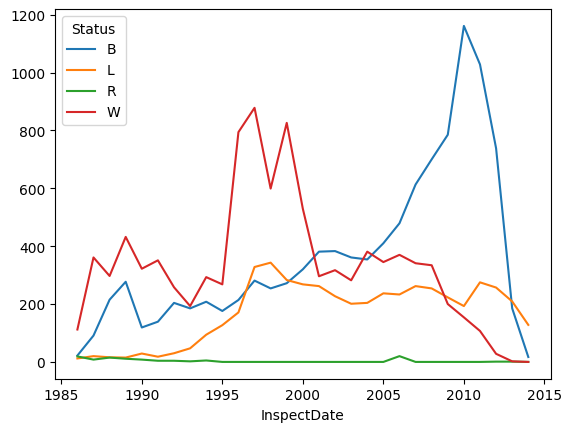

In [6]:
%matplotlib inline
by_year.plot()

Using the answer i got in question 2, i would plot a line chart to tell my observation on the change in status trends.

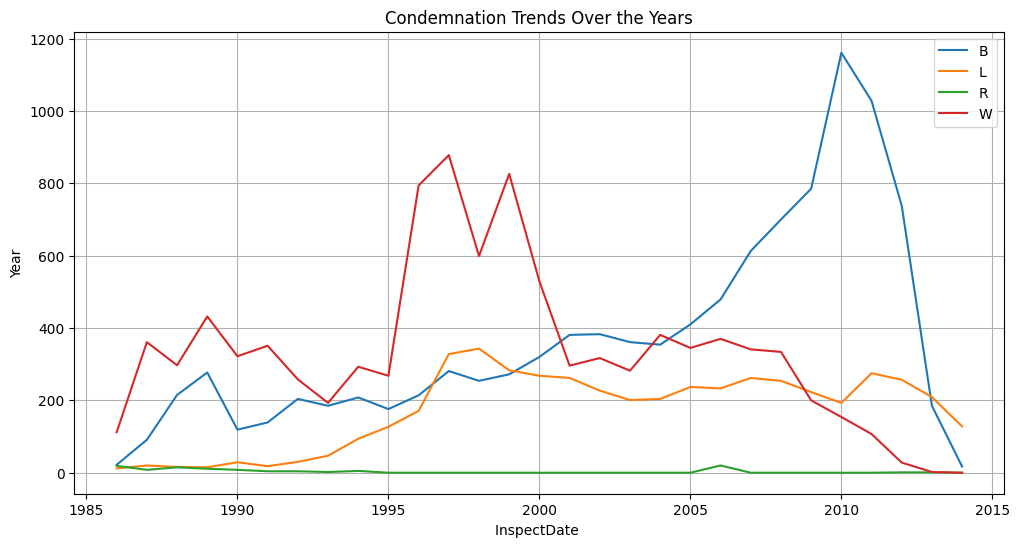

In [12]:
import matplotlib.pyplot as plt

# My dataFrame from Answer 2
data = {
    'B': [22, 91, 215, 277, 119, 139, 204, 185, 208, 176, 214, 281, 254, 272, 320, 381, 383, 361, 354, 410, 479, 613, 700, 785, 1161, 1028, 738, 185, 17],
    'L': [12, 20, 16, 15, 29, 18, 30, 47, 94, 127, 171, 328, 343, 283, 268, 262, 227, 201, 204, 237, 233, 262, 254, 223, 193, 275, 257, 209, 128],
    'R': [19, 8, 15, 11, 8, 4, 4, 2, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 1, 1, 0],
    'W': [112, 361, 297, 432, 322, 351, 258, 193, 293, 268, 794, 878, 599, 826, 529, 296, 317, 282, 381, 345, 370, 341, 334, 200, 154, 107, 28, 2, 0]
}

# Create a DataFrame from the data
df = pd.DataFrame(data, index=range(1986, 2015))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['B'], label='B')
plt.plot(df.index, df['L'], label='L')
plt.plot(df.index, df['R'], label='R')
plt.plot(df.index, df['W'], label='W')

# Add labels and title
plt.xlabel('InspectDate ')
plt.ylabel('Year')
plt.title('Condemnation Trends Over the Years')
plt.legend()
plt.grid(True)
plt.show()


The blue line (Status 'B') starts at a relatively low level in 1986, rises gradually, and reaches its peak around 2000, then falls to zero by 2011.
The orange line (Status 'L') seems to exhibit a complex pattern, with a gradual rise, some fluctuations, and a peak around 2011 without crossing 300 on the y-axis.
The green line (Status 'R') starts at 100, exhibits a peak around 1991 (forming an 'M' shape), then rises again around 1996-2001 before falling to zero by 2011.
The red line (Status 'W') has a short rod from 1986 to 1995, then exhibits a significant rise and fall between 1996 and 2001, followed by a steady decline to zero by 2011.

---

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage changed during the beginning of COVID-19.  This real data.  Please don't judge anyone based on the information here.  ;)  The data is in the `https://hds5210-data.s3.awsamazon.com/meetings.csv` file.

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [8]:
import pandas as pd
meetings =  pd.read_csv('https://hds5210-data.s3.amazonaws.com/meetings.csv')

In [24]:

def calculate_meeting_summary(meetings: pd.DataFrame) -> pd.DataFrame:
    """
    This function will calculate the meeting summary for each user, comparing the number of meetings hosted
    for the last two weeks of February and the last two weeks of March.

    Parameters:
    - meetings (pd.DataFrame): ('https://hds5210-data.s3.amazonaws.com/meetings.csv')

    Returns:
    - pd.DataFrame: Output DataFrame (summary) with columns 'Before', 'During', and 'pctChange'.
    """

     # Extract the day part of the startTime column
    meetings['startDate'] = meetings['startTime'].str[0:10]

    # Set values for the "BEFORE" and "DURING" weeks
    meetings.loc[meetings['startDate'].between('2020-02-17', '2020-02-28'), 'Week'] = 'BEFORE'
    meetings.loc[meetings['startDate'].between('2020-03-16', '2020-03-27'), 'Week'] = 'DURING'

    # Create a pivot table
    pivot_table = pd.pivot_table(meetings, index='userName', columns='Week', values='startDate', aggfunc='count', fill_value=0)

    # Calculate the percent change
    pivot_table['pctChange'] = ((pivot_table['DURING'] - pivot_table['BEFORE']) / pivot_table['BEFORE']).round(3)

    # Create the summary dataframe
    summary = pivot_table[['BEFORE', 'DURING', 'pctChange']]

    return summary

# Calculate the meeting summary
summary = calculate_meeting_summary(meetings)

# Display the summary dataframe
print(summary)

Week                            BEFORE  DURING  pctChange
userName                                                 
Drew.Marco                          12      19      0.583
amit.bhagat                         17      30      0.765
andrea.bryant.amitechsolutions       5       3     -0.400
angie.warren                         5       9      0.800
chris.rogers.amitechsolutions        4       3     -0.250
eric.keeney                         15      27      0.800
eric.rodman                          4      12      2.000
jeff.hatfield.amitechsolutions      13      26      1.000
jennifer.patton.amitechs             5       7      0.400
jessica.sikora                       3       7      1.333
matt.allsup                          5       0     -1.000
matt.brown.amitechsolutions          1       2      1.000
melissa.menne                       10       9     -0.100
michael.demos                        5      11      1.200
paul.boal                           15      35      1.333
paul.smith.ami

In [20]:
assert(len(summary) == 22)

In [25]:
assert(summary['pctChange'].mean().round(2) == 0.92)



---



## Submitting Your Work

Submit as usual
